<a href="https://colab.research.google.com/github/edenLee94/analytics/blob/main/%08kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

## Local folder에서 파일 불러오기

In [5]:
from google.colab import files
uploaded = files.upload()

Saving lspoons_test.csv to lspoons_test.csv
Saving lspoons_train.csv to lspoons_train.csv
Saving sample_submission.csv to sample_submission.csv
Saving store.csv to store.csv


In [6]:
train = pd.read_csv("lspoons_train.csv")
test = pd.read_csv("lspoons_test.csv")
store = pd.read_csv("store.csv")

In [7]:
train.head()

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0


## 피처 엔지니어링

Def: 예측을 위해 기존의 input 변수를 이용하여 새로운 input 변수(new column)를 만들어내는 것이다.
기존 변수 + 새로운 column과 함께 이용해서 predict를 하는 것이다.


### StateHoliday 변수 변환

In [8]:
train['StateHoliday'].value_counts()

0    62208
a       18
b       13
c        5
Name: StateHoliday, dtype: int64

In [9]:
train = pd.get_dummies(columns=['StateHoliday'], data=train)
test = pd.get_dummies(columns=['StateHoliday'], data=test)

In [10]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [11]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


test, train 데이터의 컬럼이 조금 다르다. -> 활용할 수 있는 컬럼이 다르다 
=> 통일시켜줘야한다. 

In [12]:
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [ ]:
test.head()

### Date 변수를 활용한 Feature engeneering(FE)

In [15]:
pd.to_datetime(train['Date']).dtypes

dtype('<M8[ns]')

In [16]:
train['Date']= pd.to_datetime(train['Date'])
test['Date']= pd.to_datetime(test['Date'])

In [17]:
train['Date'].dt.weekday

0        4
1        4
2        4
3        3
4        3
        ..
62239    4
62240    4
62241    4
62242    4
62243    4
Name: Date, Length: 62244, dtype: int64

In [18]:
train['Date'].dt.month

0        5
1        5
2        5
3        4
4        4
        ..
62239    8
62240    8
62241    8
62242    8
62243    8
Name: Date, Length: 62244, dtype: int64

In [19]:
train['weekday'] =train['Date'].dt.weekday
test['weekday'] =test['Date'].dt.weekday

In [20]:
train['year'] =train['Date'].dt.year
test['year'] =test['Date'].dt.year

In [21]:
train['month'] =train['Date'].dt.month
test['month'] =test['Date'].dt.month

In [22]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


## baseline modeling(베이스라인 모델링)

Def: 적은 FE를 하고 간단한 모델을 활용해서 모델링을 하는 것

In [23]:
from xgboost import XGBRegressor

In [24]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state = 2020)

In [26]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


In [27]:
train.dtypes

id                         int64
Store                      int64
Date              datetime64[ns]
Sales                      int64
Promo                      int64
SchoolHoliday              int64
StateHoliday_0             uint8
StateHoliday_a             uint8
StateHoliday_b             uint8
StateHoliday_c             uint8
weekday                    int64
year                       int64
month                      int64
dtype: object

In [25]:
xgb.fit(train[['Promo', 'SchoolHoliday', 'StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c', 'weekday','year', 'month']],
        train['Sales'])

[07:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=300, random_state=2020)

In [28]:
test['Sales'] = xgb.predict(test[['Promo', 'SchoolHoliday', 'StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c', 'weekday','year', 'month']])

In [29]:
# test[['id', 'Sales']].to_csv("submission.csv", index=False)

,id,Sales
0,0,9706.320312
1,1,9208.548828
2,2,9706.320312
3,3,9706.320312
4,4,9208.548828
...,...,...
14924,14924,7850.427246
14925,14925,7850.427246
14926,14926,7850.427246
14927,14927,7850.427246


In [36]:
train.sort_values(by=['id'])

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,77168,1106,2014-08-01,5284,1,1,1,0,0,0,4,2014,8
62240,77169,1108,2014-08-01,6249,1,1,1,0,0,0,4,2014,8
62241,77170,1111,2014-08-01,5199,1,1,1,0,0,0,4,2014,8
62242,77171,1112,2014-08-01,10058,1,1,1,0,0,0,4,2014,8


성능이 좋지않은걸로 보인다. -> 변수 선택을 해야할 것 같다.

#### 변수 중요도를 알아보자

In [37]:
xgb.feature_importances_

array([0.75569   , 0.02409515, 0.00298334, 0.00158533, 0.00440749,
       0.0009478 , 0.09744239, 0.0385003 , 0.07434825], dtype=float32)

In [38]:
input_var = ['Promo', 'SchoolHoliday', 'StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c', 'weekday','year', 'month']

#### 시각화를 통해서 변수 중요도를 확인해보자

In [39]:
imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})

In [40]:
imp_df

,var,imp
0,Promo,0.755690
1,SchoolHoliday,0.024095
2,StateHoliday_0,0.002983
3,StateHoliday_a,0.001585
4,StateHoliday_b,0.004407
5,StateHoliday_c,0.000948
6,weekday,0.097442
7,year,0.038500
8,month,0.074348


In [41]:
imp_df = imp_df.sort_values(['imp'],ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

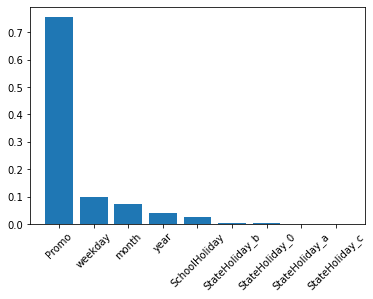

In [45]:
import matplotlib.pyplot as plt
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation=45)

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)

[07:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ -7386370.59411321, -10624701.90617675,  -7966612.0560945 ])

In [52]:
cross_val_score(xgb, train[['Promo', 'weekday', 'month', 'year']], train['Sales'], scoring="neg_mean_squared_error", cv=3)

[08:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-7424717.65085389, -9635792.53717652, -7271662.18382643])

In [58]:
import numpy as np

In [59]:
score_list = []
selected_varnum=[]

In [76]:
for i in range(1,8):
  selected_var = imp_df['var'].iloc[:i].to_list()
  scores = cross_val_score(xgb,
                           train[selected_var],
                           train['Sales'],
                           scoring="neg_mean_squared_error", cv=5)
  score_list.append(-np.mean(scores))
  selected_varnum.append(i)
  print(i)

[08:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1
[08:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

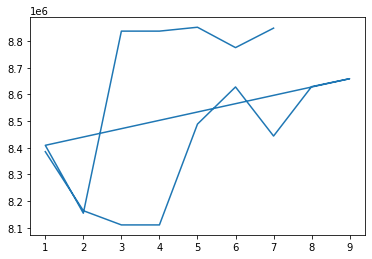

In [77]:
plt.plot(selected_varnum, score_list)

이게 왜 이럴까...

In [62]:
cross_val_score(xgb, train[['Promo', 'weekday', 'month']], train['Sales'], scoring="neg_mean_squared_error", cv=3)

[08:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-7424717.65085389, -9635792.53717652, -7271662.18382643])

In [63]:
cross_val_score(xgb, train[['Promo', 'weekday', 'month', 'year']], train['Sales'], scoring="neg_mean_squared_error", cv=3)

[08:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-7424717.65085389, -9635792.53717652, -7271662.18382643])

In [75]:
cross_val_score(xgb, train[['Promo']], train['Sales'], scoring="neg_mean_squared_error", cv=5)

[08:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ -8053872.29665628,  -6804649.64246378, -12589864.50982461,
        -7468481.18905418,  -7128874.64365698])

In [70]:
xgb.fit(train[['Promo', 'weekday', 'month', 'year']],
        train['Sales'])


[08:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=300, random_state=2020)

In [71]:
test['Sales'] = xgb.predict(test[['Promo', 'weekday', 'month', 'year']])

In [72]:
test[['id', 'Sales']].to_csv("submission.csv", index=False)